In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree,metrics,preprocessing


from sklearn import tree,metrics,preprocessing
df = pd.read_csv('iris.csv')

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [3]:
y = df['species']
x = df[['petal_length','petal_width']]
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)

In [4]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=5)

In [5]:
dtree.fit(X_train,Y_train)
y_pred= dtree.predict(X_test)
metrics.accuracy_score(Y_test,y_pred)
dot_data = tree.export_graphviz(dtree,
                                out_file = None,
                                filled = True,
                                rounded = True,
                                feature_names = ['petal_length','petal_width'],
                                class_names = ['sentosa','versicolor','virginica']
                               )

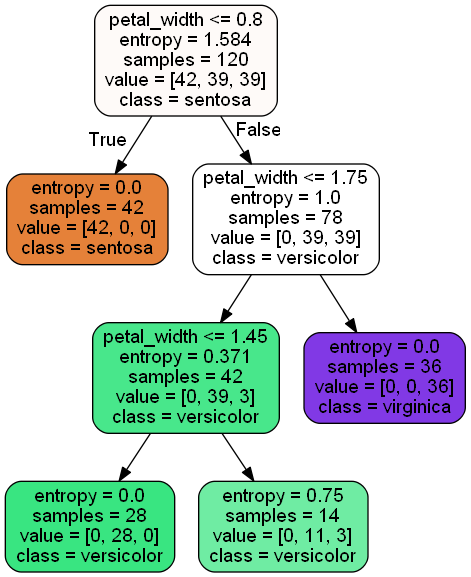

In [6]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [7]:
-(1 * np.log2(1))

-0.0

In [8]:
-((34/105) * np.log2((34/105)))

0.5267677237917774

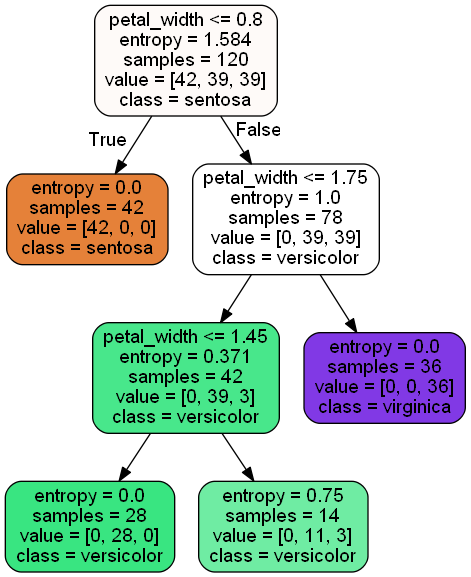

In [17]:
y = df['species']
x = df.drop(columns=['species'])
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=5)
dtree.fit(X_train,Y_train)
y_pred= dtree.predict(X_test)
metrics.accuracy_score(Y_test,y_pred)
dot_data = tree.export_graphviz(dtree,
                                out_file = None,
                                filled = True,
                                rounded = True,
                                feature_names = x.columns.tolist(),
                                class_names = ['sentosa','versicolor','virginica'])
                                
graph1 = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph1.create_png()))


In [18]:
dtree.feature_importances_

array([0., 0., 0., 1.])

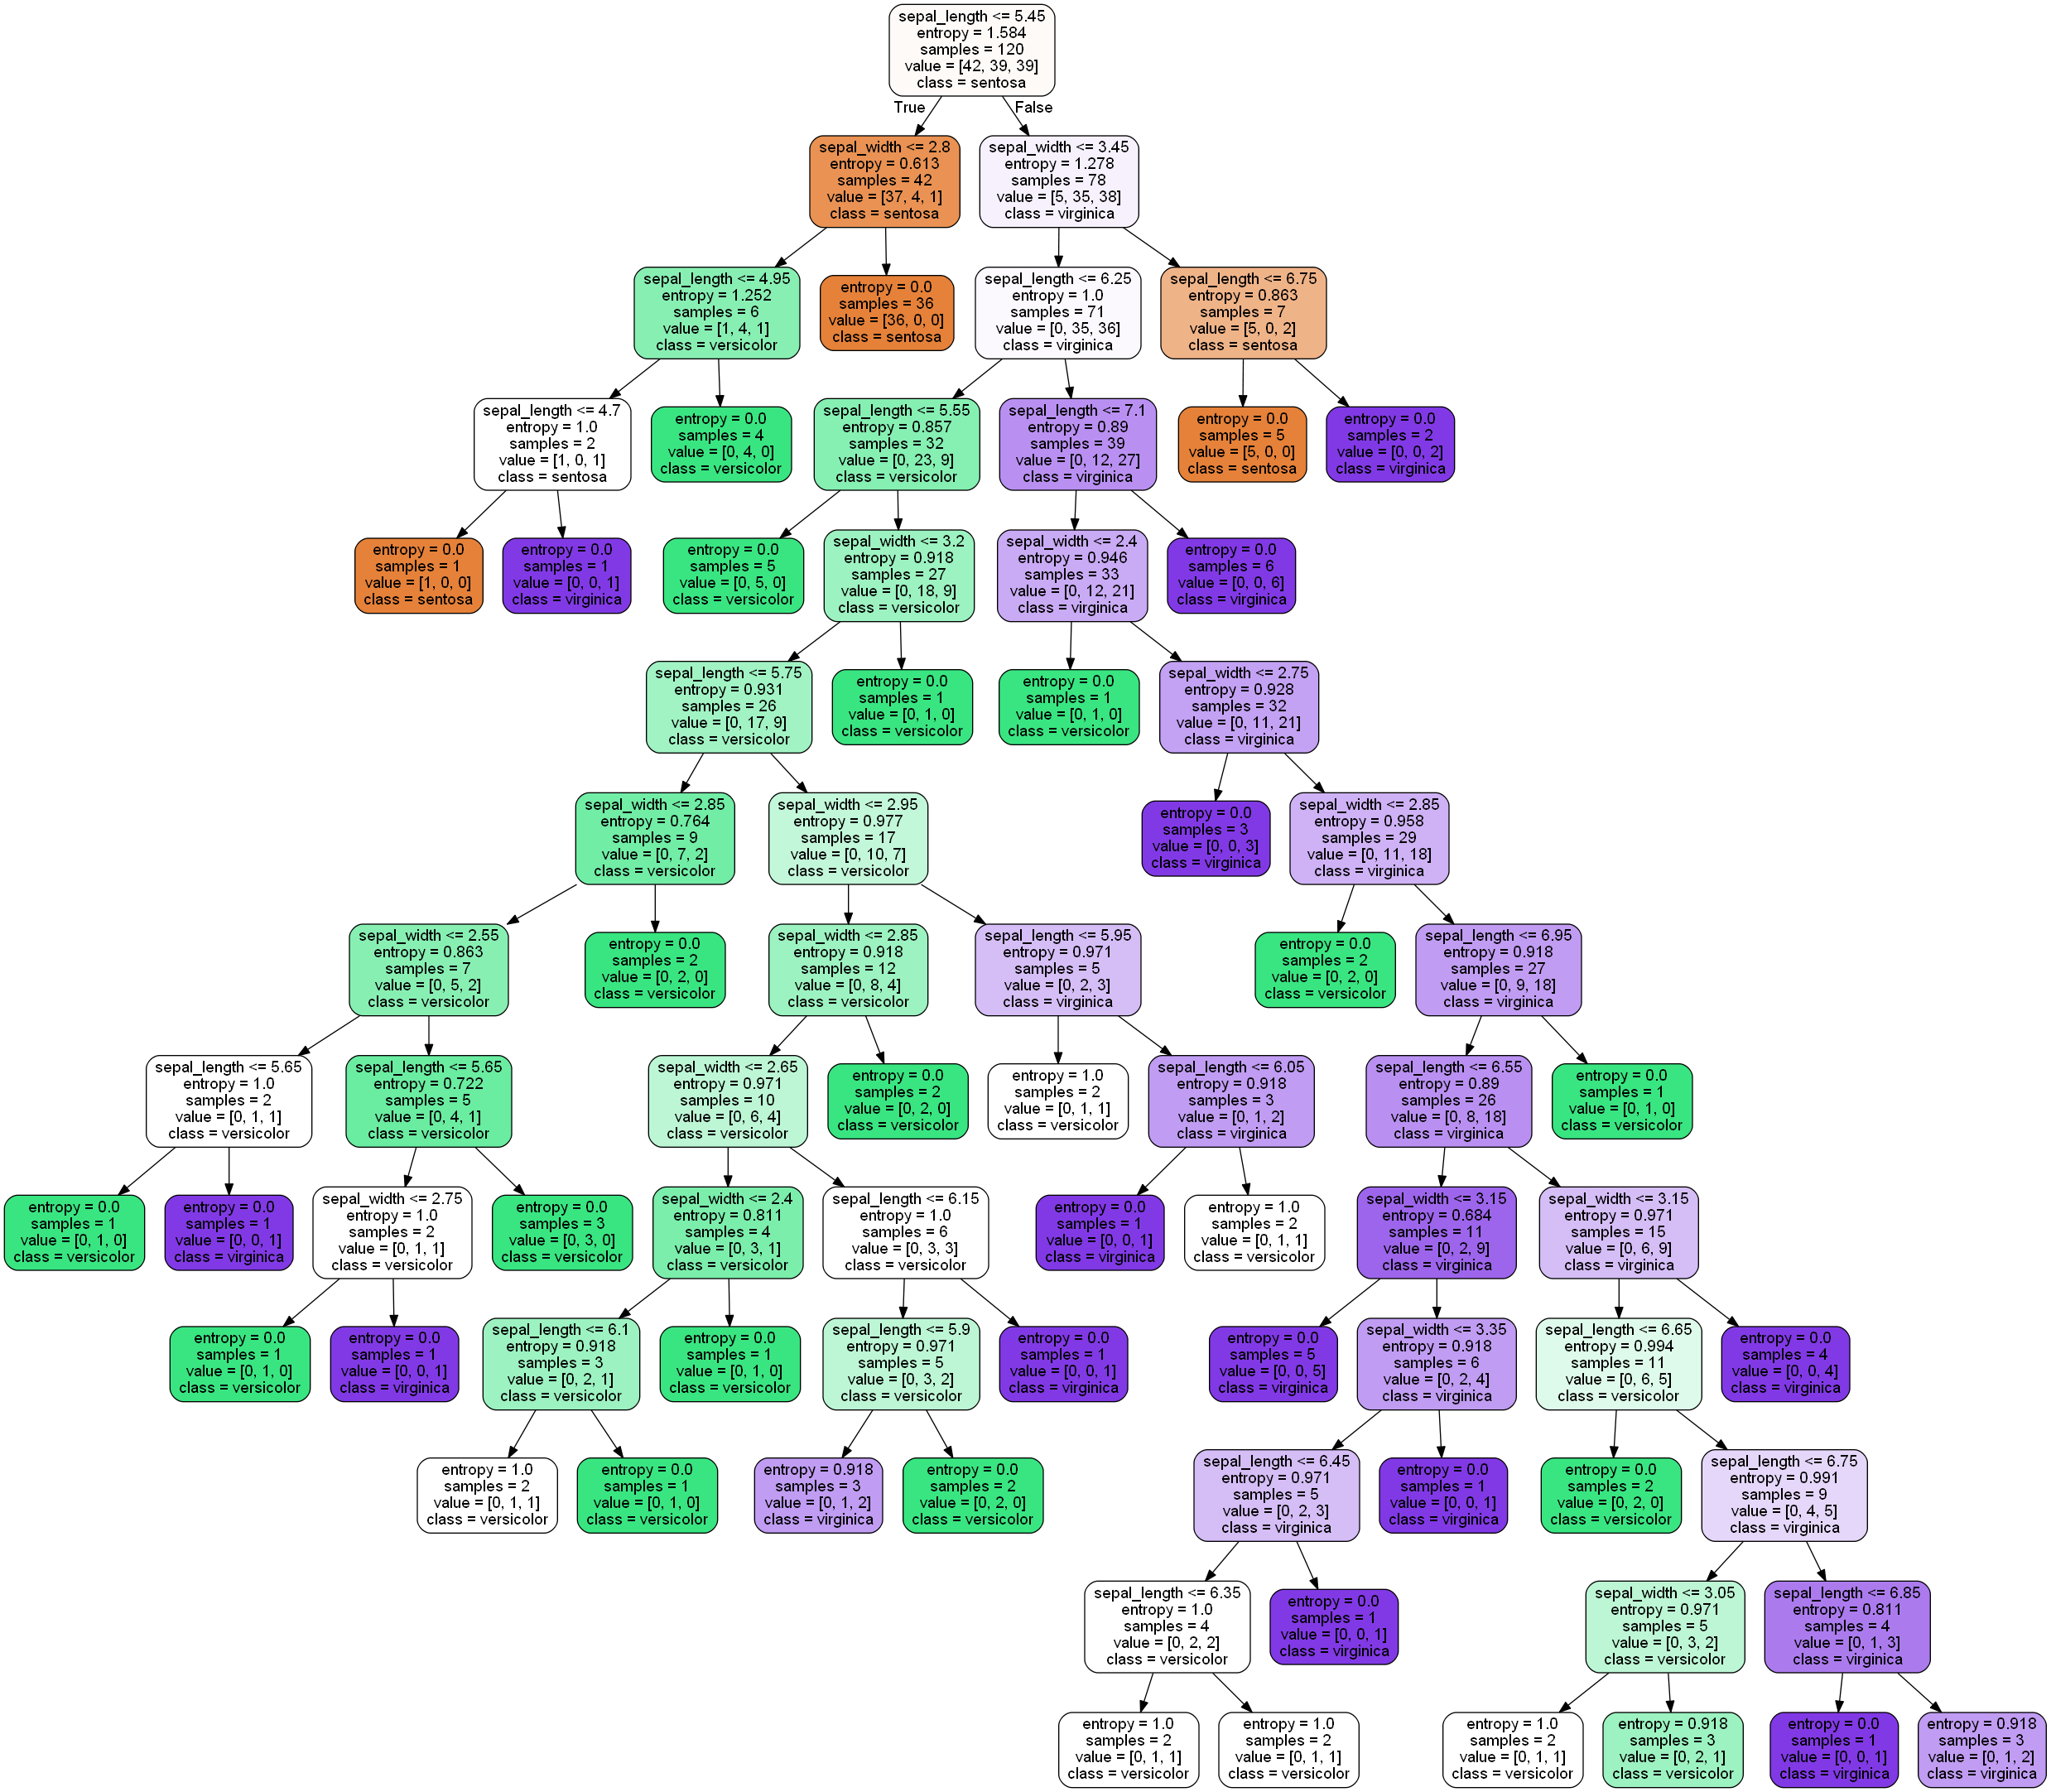

In [23]:
y = df['species']
x = df.drop(columns=['species','petal_width','petal_length'])
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
dtree = tree.DecisionTreeClassifier(criterion='entropy',random_state=5)
dtree.fit(X_train,Y_train)
y_pred= dtree.predict(X_test)
metrics.accuracy_score(Y_test,y_pred)
dot_data = tree.export_graphviz(dtree,
                                out_file = None,
                                filled = True,
                                rounded = True,
                                feature_names = x.columns.tolist(),
                                class_names = ['sentosa','versicolor','virginica'])
                                
graph1 = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph1.create_png()))

In [22]:
dtree.feature_importances_

array([0.67528309, 0.32471691])